# **Credit-Scoring na Bytebank**

## **Conhecendo o desafio**



O crédito faz parte das nossas vidas o tempo todo: cartões de crédito, empréstimos pessoais e consignados, financiamento de veículos e imobiliários, são apenas alguns dos exemplos de como o crédito está inserido no nosso dia a dia.

**Decisões na Concessão de Crédito**

Apesar da presença constante do crédito, poucas pessoas sabem quais decisões estão por trás da sua concessão. A cadeia de crédito é composta por **quatro pilares**: a prospecção, a concessão, a gestão de risco e a recuperação.

Neste projecto, vamos focar na **concessão de crédito**. Além disso, a cadeia de crédito conta com **três participantes principais**:

1. **Poupadores**: Pessoas que reservam parte do seu dinheiro para ser investido.
2. **Tomadores**: Pessoas que buscam crédito ou financiamento no mercado.
3. **Instituição Financeira**: Intermediária da relação entre poupadores e tomadores.

**Como Funciona a Cadeia de Crédito?**

Os poupadores levam o seu dinheiro aos bancos para ser investido, e os bancos disponibilizam esse valor para os tomadores que precisam de crédito.

É uma **relação bilateral**. Os poupadores buscam rendimentos sobre seus investimentos, mas **é o banco quem define as condições** da aplicação. Da mesma forma, os tomadores solicitam crédito aos bancos, mas **é o banco que decide** se o crédito será concedido e quais serão as condições dessa concessão.


O **Credit Scoring** procura estimar a probabilidade de um evento acontecer com base numa determinada base de dados. Como estamos a falar de uma probabilidade, o valor está sempre concentrado entre **0** e **1**, e as suas aplicações são variadas.

Pensando na concessão de crédito, o evento que estamos a tentar prever é se um tomador vai ser **inadimplente**. Por isso, queremos classificar os nossos solicitantes como **adimplentes** ou **inadimplentes**, tratando-se de um evento **binário**.

Toda operação de crédito está intrinsecamente relacionada ao **risco**, e não conseguimos dissociar estas duas componentes. O risco está sempre presente. Podemos entender o **risco de crédito** como a probabilidade de uma instituição financeira não receber o montante de dinheiro esperado num determinado período. Ou seja, a expectativa da instituição de recuperar o valor emprestado no prazo acordado não será cumprida.

Parte dos **juros** associados ao empréstimo reflete também este risco de crédito.


### Credit-scoring

O **Credit Scoring** é um modelo estatístico multivariado que cria um modelo matemático e estima, através de uma probabilidade, a chance de um cliente ser **adimplente** ou **inadimplente**. 

Vamos pensar numa situação prática: você fez a solicitação de crédito para o **ByteBank**, já forneceu todas as suas informações cadastrais e financeiras, e agora está à espera da resposta. 

**Análise do Crédito**

O tomador de crédito vai até o banco, faz a solicitação e entrega os seus dados. O banco, por sua vez, utiliza essa solicitação e analisa-a através de um modelo de decisão, como o **Credit Scoring**. Até este ponto, ainda não sabemos se o crédito será aprovado ou não, pois a análise está em curso. É neste contexto que vamos entender como funciona este modelo de **Credit Scoring**.

**Por que usar a Regressão Logística?**

Neste projecto, vamos focar na **regressão logística**, uma técnica amplamente utilizada no sistema financeiro por vários motivos:

1. **Explicabilidade**: A regressão logística é transparente, permitindo acompanhar as variáveis e replicar o modelo facilmente. Isso é particularmente útil para **fins de fiscalização**.
2. **Baixo custo computacional**: Bancos lidam com grandes volumes de dados, e a regressão logística exige menos poder computacional, o que aumenta a eficiência sem comprometer a performance.

É por estas razões que optamos por utilizar a **regressão logística** no nosso modelo de **Credit Scoring**.


## **Preparando e processando os dados**

### Importando os dados

In [242]:
import pandas as pd

In [243]:
df = pd.read_csv('base_dados_traduzida.csv')
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Verificando a integridade dos dados

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [245]:
linhas = df.shape[0]
colunas = df.shape[1]

print('A bas de dados tem %s linhas e %s colunas' %(linhas, colunas))

A bas de dados tem 1000 linhas e 21 colunas


In [246]:
duplicados = df.duplicated().sum()

print('A base de dados tem %s dados duplicados.' %(duplicados))

A base de dados tem 0 dados duplicados.


In [247]:
nulos = df.isnull().sum()
nulos

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

### **Transformação de Categorias** 

In [248]:
df.head(3)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


Nós só conseguimos fazer uma regressão logística com valores numéricos e, nesta base de dados, nós temos muitos valores categóricos, e essas categorias são todas strings.
Então precisamos fazer um ajuste aqui, precisamos manipular essa base de uma maneira que consigamos modelar. A solução imediata é transformar essas categorias, essas strings , em labels numéricas. Primeiro eu vou pegar a nossa primeira variável que é uma string e vou entender quais são os diferentes valores que essas categorias podem ter.
 Ele me trara como resposta, um array , que são todos os valores únicos que essa variável recebe. Então através do map , vamos transformar essas categorias. Para cada valor que essa variável recebe de categoria, eu vou atribuir um número. 
 
 **Irei repetir o processo para as demais variaveis.**

In [249]:
#verifica strings da variavel 'conta_corrente'
df['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [250]:
#mudando categoria variavel 'conta_corrente'

a = { 'no checking account' : 4,
      '>= 200 DM / salary assignments for at least 1 year' : 3,
      '0 <= ... < 200 DM' : 2,
      '< 0 DM' : 1     
}
df['conta_corrente'] = df['conta_corrente'].map(a)

In [251]:
df['historico_credito'].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [252]:
#mudando categoria variavel 'historico_credito'

a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5     
}
df['historico_credito'] = df['historico_credito'].map(a)

In [253]:
df['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [254]:
#mudando categoria variavel 'proposito_emprestimo'

a = { 'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
}
df['proposito_emprestimo'] = df['proposito_emprestimo'].map(a)

In [255]:
df['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [256]:
#mudando categoria variavel 'reserva_cc'

a = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5     
}
df['reserva_cc'] = df['reserva_cc'].map(a)

In [257]:
df['tempo_emprego_atual'].unique

<bound method Series.unique of 0           .. >= 7 years
1      1 <= ... < 4 years
2      4 <= ... < 7 years
3      4 <= ... < 7 years
4      1 <= ... < 4 years
              ...        
995    4 <= ... < 7 years
996    1 <= ... < 4 years
997         .. >= 7 years
998    1 <= ... < 4 years
999            unemployed
Name: tempo_emprego_atual, Length: 1000, dtype: object>

In [258]:
#mudando categoria variavel 'tempo_emprego_atual'

a = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5     
}
df['tempo_emprego_atual'] = df['tempo_emprego_atual'].map(a)

In [259]:
df['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [260]:
#mudando categoria variavel 'sexo_est_civil'

a = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5     
}
df['sexo_est_civil'] = df['sexo_est_civil'].map(a)

In [261]:
df['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [262]:
#mudando categoria variavel 'outros_fiadores'

a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3    
}
df['outros_fiadores'] = df['outros_fiadores'].map(a)

In [263]:
df['propriedade'].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [264]:
#mudando categoria variavel 'propriedade'

a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4 
}
df['propriedade'] = df['propriedade'].map(a)

In [265]:
df['outros_planos_financiamento'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [266]:
#mudando categoria variavel 'outros_planos_financiamento'

a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3 
}

df['outros_planos_financiamento'] = df['outros_planos_financiamento'].map(a)

In [267]:
df['tipo_residencia'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [268]:
#mudando categoria variavel 'tipo_residencia'

a = { 'rent' : 1,
      'own' : 2,
      'for free' : 3 
}

df['tipo_residencia'] = df['tipo_residencia'].map(a)

In [269]:
df['status_emprego'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [270]:
#mudando categoria variavel 'status_emprego'

a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
df['status_emprego'] = df['status_emprego'].map(a)

In [271]:
df['telefone'].unique()

array(['yes, registered under the customers name ', 'none'], dtype=object)

In [272]:
#mudando categoria variavel 'telefone'

a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
df['telefone'] = df['telefone'].map(a)

In [273]:
df['trabalhador_estrangeiro'].unique()

array(['yes', 'no'], dtype=object)

In [274]:
#mudando categoria variavel 'trabalhador_estrangeiro'

a = { 'yes' : 1,
      'no' : 0
}
df['trabalhador_estrangeiro'] = df['trabalhador_estrangeiro'].map(a)
df.head(3)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1


 Agora aqui já podemos ver o cabeçalho da base, todo com ela toda transformada. Todas as categorias agora são números.

## **Análise e Visualização dos dados**

### **Análise Descritiva**

 Agora que já criamos o nosso primeiro modelo de teste sem fazer nenhum tratamento nas variáveis ou sem entender mais profundamente os nossos dados, chegou a hora de fazermos a análise descritiva da nossa base. Lembrando que o primeiro passo para criar um bom modelo, ou seja, um modelo funcional e que atenda às nossas necessidades, é importante entendermos como estão esses dados, qual é o comportamento deles.

In [275]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']  # Definindo a lista de variaveis a analizar
df[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.68200,35.546000,20.903000,3271.258000,0.300000
std,0.70808,11.375469,12.058814,2822.736876,0.458487
min,1.00000,19.000000,4.000000,250.000000,0.000000
25%,2.00000,27.000000,12.000000,1365.500000,0.000000
50%,3.00000,33.000000,18.000000,2319.500000,0.000000
75%,3.00000,42.000000,24.000000,3972.250000,1.000000
max,4.00000,75.000000,72.000000,18424.000000,1.000000


O método `.describe()` nos fornece algumas **métricas estatísticas** importantes para a análise de uma variável. Essas métricas incluem **contagem**, **média**, **desvio padrão**, **mínimo**, **percentis** (25%, 50%, 75%) e **máximo**.

Por exemplo, na variável **idade**, podemos observar que a **idade média** dos solicitantes de crédito é **35.5 anos**. O solicitante mais jovem tem **19 anos** e o mais velho tem **75 anos**. Para o **prazo do crédito**, a **média de tempo** é de **20 meses**, com o valor máximo sendo **72 meses**.

Em relação ao **valor do empréstimo**, a **média** é de **€3271.26**, o menor empréstimo é de **€250** e o maior é de **€18424**.

No entanto, quando aplicamos o `.describe()` em variáveis categóricas, como **sexo_estado_civil**, o resultado não nos oferece muitas informações úteis. A média, por exemplo, é **2.68**, mas como é uma variável categórica, isso não fornece um entendimento significativo. O mesmo ocorre com a variável **default**, que é **binária**. Aplicar `.describe()` nela também não faz sentido, pois só possui dois valores possíveis (0 ou 1).
oomportam.
alisem como esses dados se comportam.


### Análise de variáveis categóricas

In [276]:
#homem = categorias 1, 3, 4
#mulher = categorias 2, 5

df['sexo_est_civil'].value_counts()


sexo_est_civil
3    548
2    310
4     92
1     50
Name: count, dtype: int64

Temos 310 mulheres e 690 homens

In [277]:
df['default'].value_counts()

#0 emprestimos negados
#1 emprestios concedidos
#A nossa base de dados e desbalanceada, porque a mais emprestimos negados do que concedidos

default
0    700
1    300
Name: count, dtype: int64

Olhando para as métricas que nós já aprendemos, podemos perceber que a acurácia, por exemplo, não é um bom parâmetro para avaliarmos o modelo que foi desenvolvido em cima de uma base de dados desbalanceados, isso porque os parâmetros do modelo não diferenciam a classe majoritária da minoritária. Mas, ainda assim, terá uma alta acurácia e podemos acreditar que isso agrega algum valor, mas na verdade não agrega.

### **Histogramas**

 Depois que nós analisamos estatisticamente a nossa base de dados, o próximo passo para um bom modelo é entender como funciona a distribuição de algumas variáveis que são importantes para o nosso modelo. Para isso, precisamos de uma boa visualização de dados e contamos com diversos tipos de gráficos para nos auxiliar nesse processo.
 A organização dos dados em gráficos, ela é muito importante para podermos entender como a nossa base de dados e algumas variáveis se comportam ao longo do tempo. Para isso, precisamos usar dados adequados para visualizar diferentes variáveis.

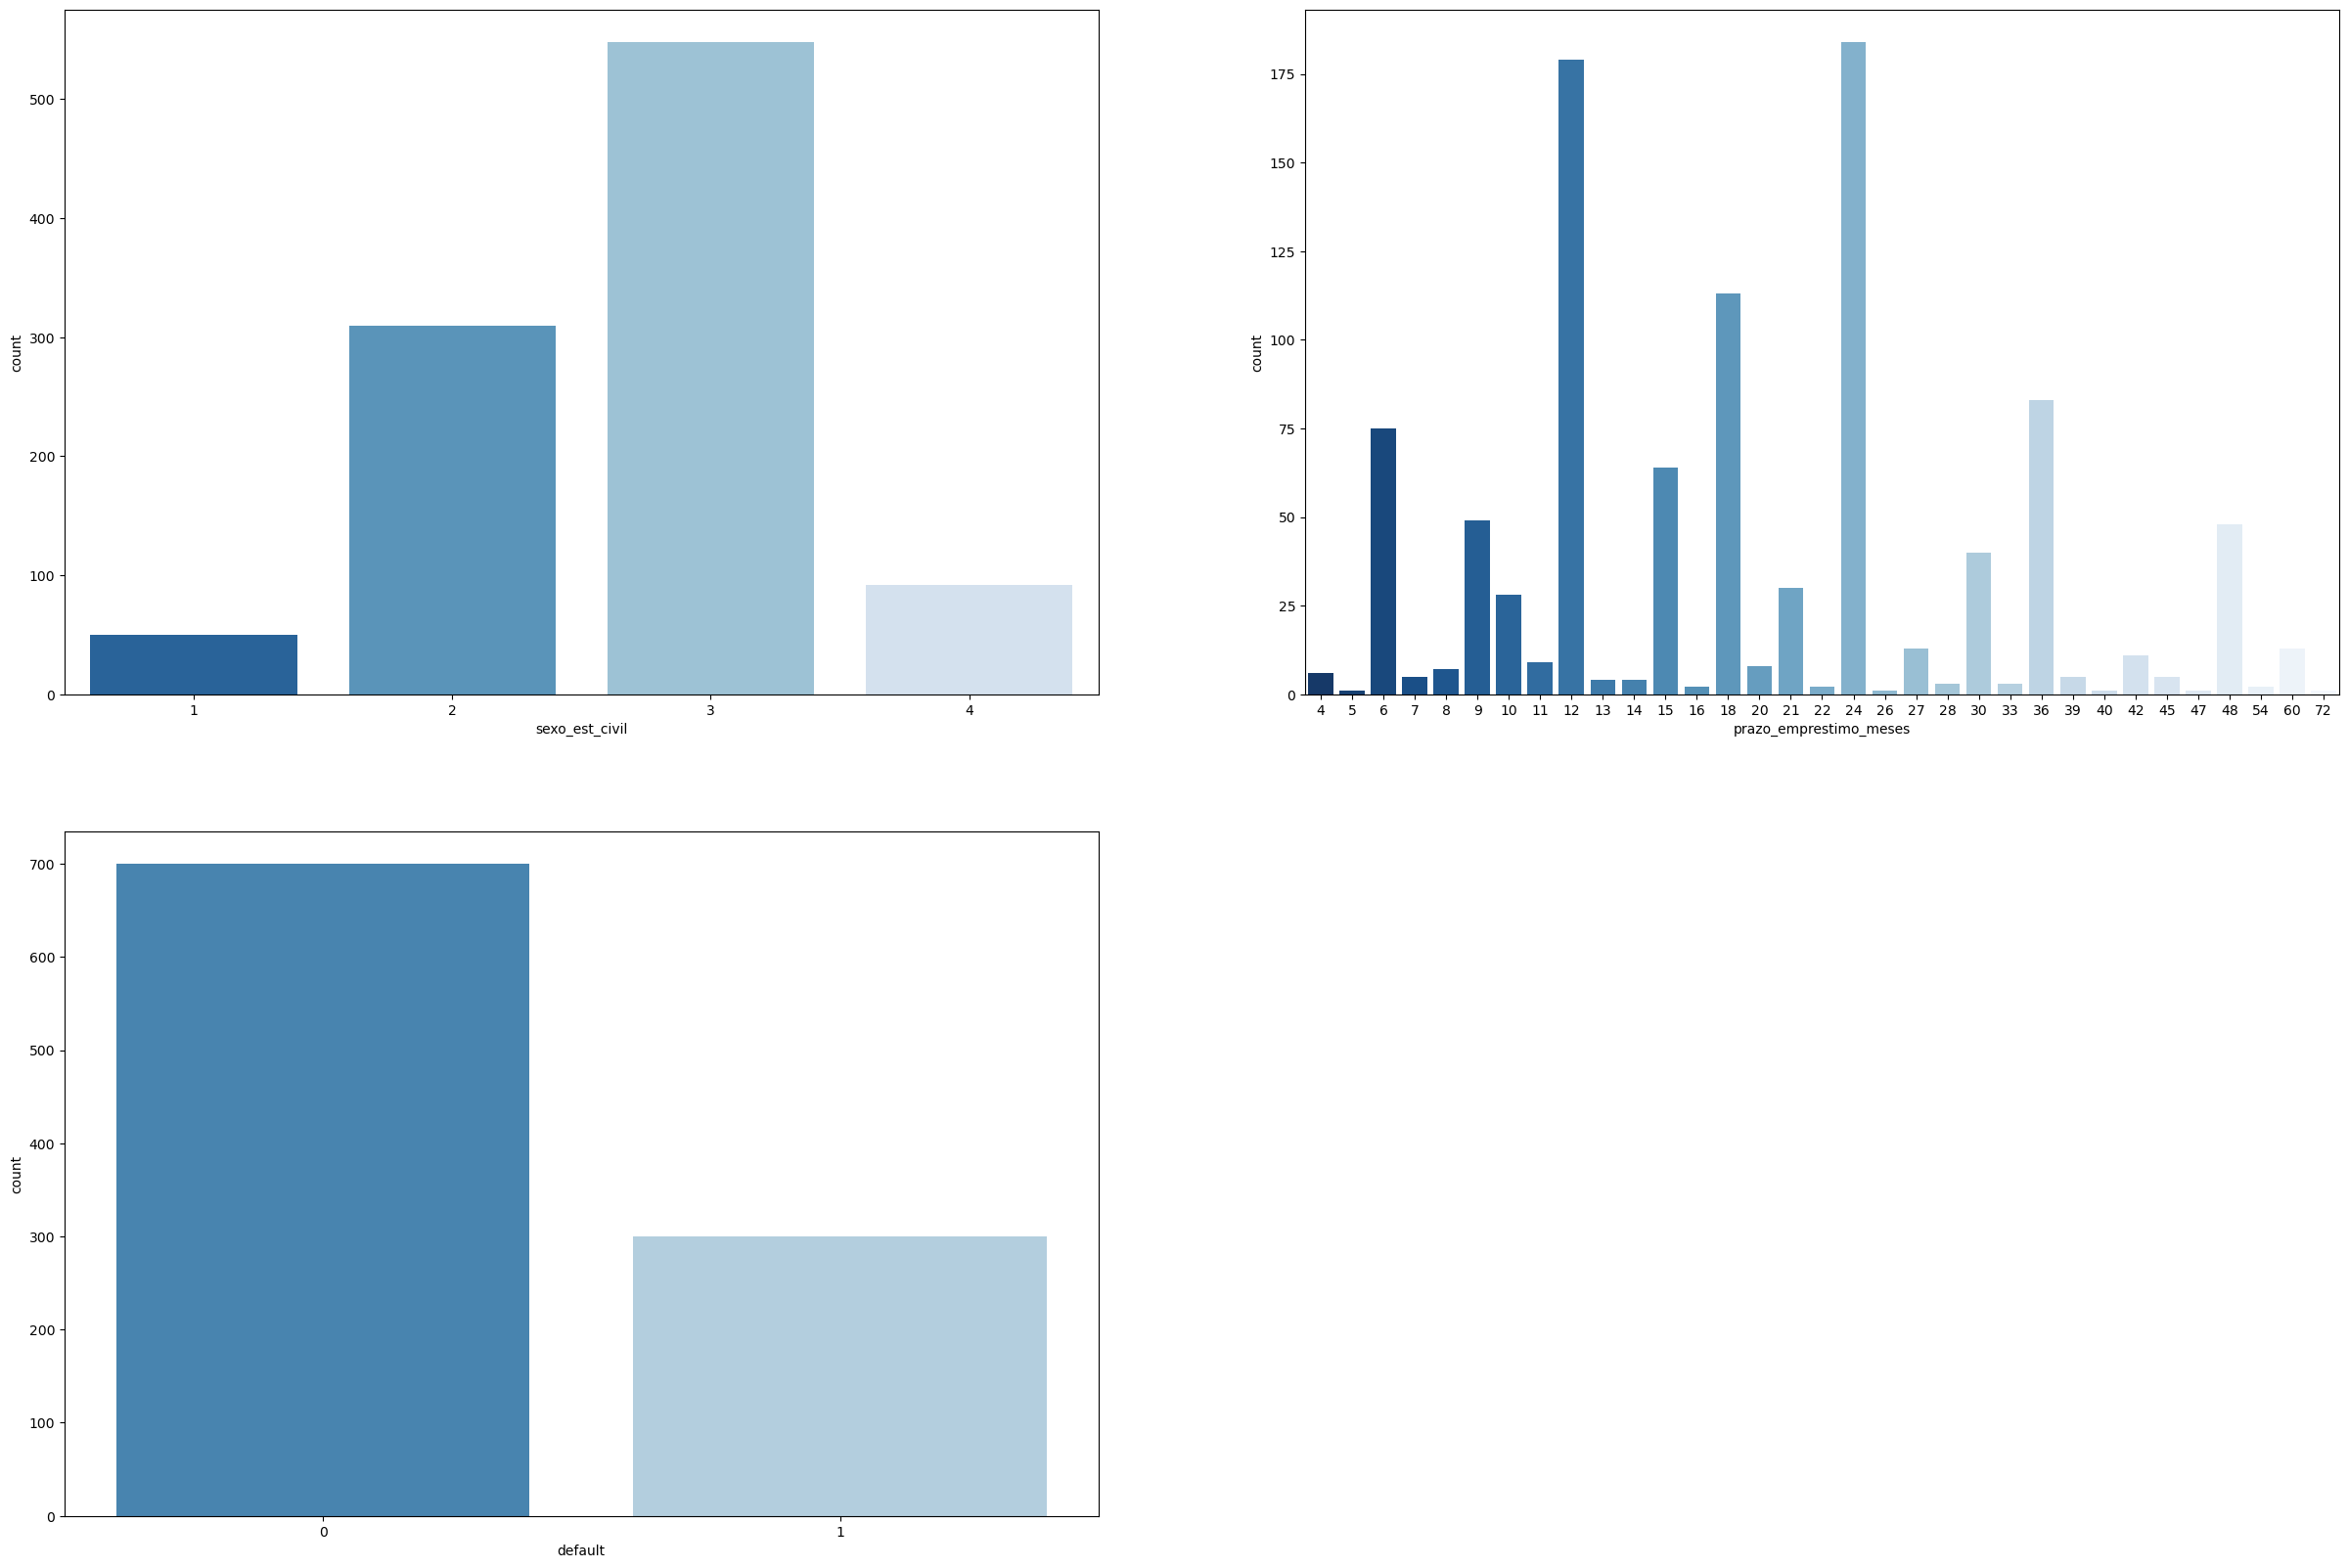

In [278]:
import seaborn as sns

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize = (30,20))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data = df, palette="Blues_r")


O primeiro histograma que estamos analisando é da variável **"sexo_est_civil"**. Ele segue a ordem definida no código, e observamos a seguinte distribuição:

- Menos de **100 eventos** na classe 1
- Um pouco mais de **300 eventos** na classe 2
- Mais de **500 eventos** na classe 3
- Quase **100 eventos** na classe 4

Sabemos que a variável tem **5 categorias**, mas o histograma não apresenta a quinta coluna porque já verificamos que não há eventos nessa categoria.

O segundo histograma é da variável **"prazo_emprestimo_meses"**. No `.describe()`, vimos que o mínimo de tempo é **4 meses** e o máximo é **72 meses**. Observamos uma alta concentração de eventos em **12 meses** e **24 meses**, indicando que muitos empréstimos têm prazos de **1 ou 2 anos**.

Além disso, há alguns valores notáveis como **6 meses**, **18 meses**, **36 meses** e **48 meses**, mas os dois períodos com maior frequência são **12** e **24 meses**.

O terceiro boxplot é da variável **default**, que é nossa variável resposta. Podemos verificar que há:

- **700 casos** com valor **0**
- **300 casos** com valor **1**

Isso revela que a nossa base de dados está **desbalanceada**.

Embora os três boxplots ofereçam uma visão útil, a variável **"prazo_emprestimo_meses"** poderia ser melhor organizada para um boxplot mais claro. No entanto, conseguimos uma boa compreensão da distribuição dos nossos dados.


### **BoxPlots**

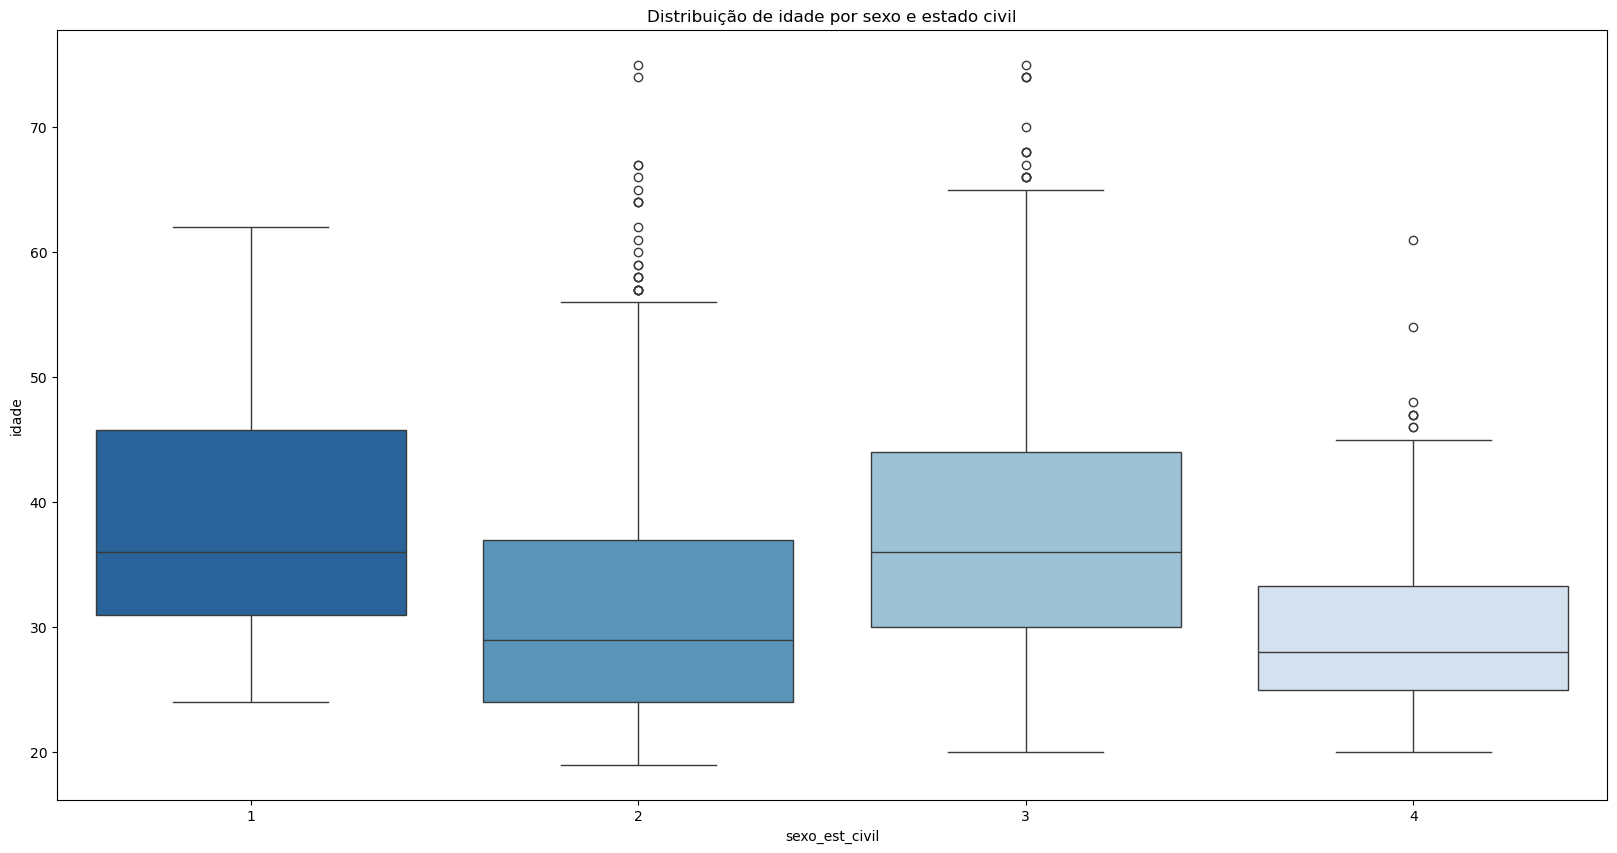

In [279]:
plt.figure(figsize=(20,10))
sns.boxplot(x='sexo_est_civil', y='idade', data = df, palette='Blues_r')
plt.title('Distribuição de idade por sexo e estado civil')
plt.show()

### **Gráfico de Barras**

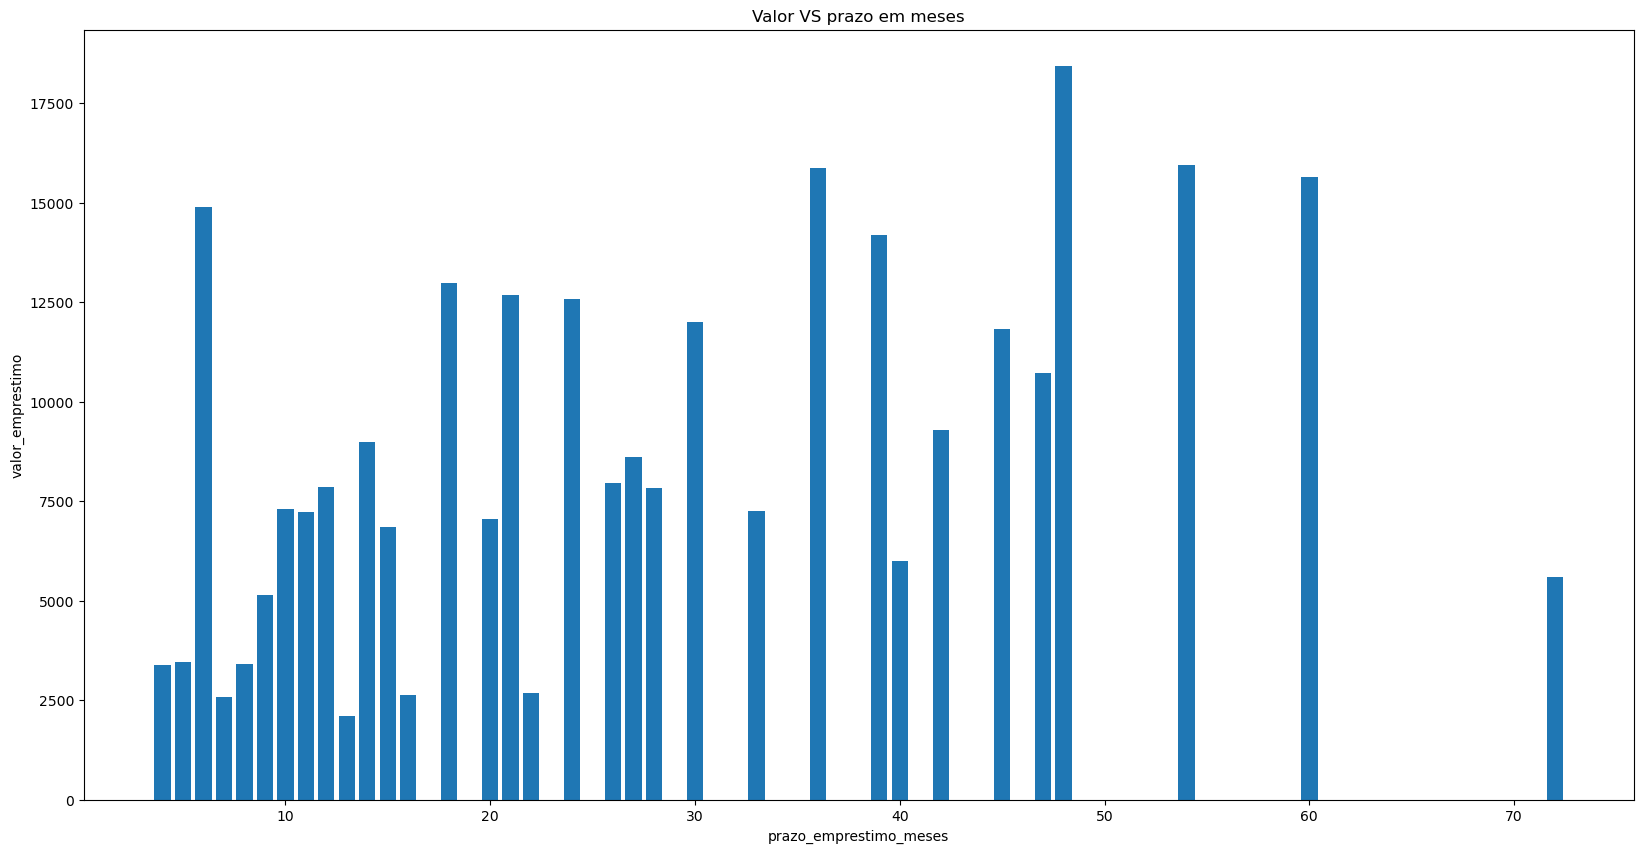

In [280]:
plt.figure(figsize = (20,10))

plt.bar(df.prazo_emprestimo_meses, df.valor_emprestimo)

plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor VS prazo em meses')

plt.show()

Através de diferentes tipos de gráficos, como o **histograma**, o **boxplot** e o **gráfico de barras**, conseguimos verificar a distribuição dos nossos dados de maneiras distintas. Cada tipo de gráfico oferece uma perspectiva diferente:

- **Histograma**: Mostra a frequência de uma variável. Essa frequência pode ser absoluta, relativa ou uma densidade, fornecendo dados de forma quantitativa.
  
- **Boxplot**: É uma ferramenta estatística poderosa que permite identificar vários parâmetros estatísticos. Ele mostra a mediana, o menor e o maior valor, o primeiro e o terceiro quartil, e também valores discrepantes. No exemplo fornecido, comparamos a idade com o sexo e estado civil, resultando em quatro boxplots, um para cada categoria.

- **Gráfico de Barras**: É utilizado para comparar categorias de uma variável e mostrar a distribuição delas. A distribuição pode ser absoluta ou percentual, relativa a algum contexto.

Além desses três tipos de gráficos, existem outros, como o **gráfico de dispersão**, que também pode ser útil para analisar dados. Vocês podem experimentar fazer gráficos com outras variáveis ou aplicar os gráficos que já aprendemos em diferentes contextos.


## **Regressão Logística**

### **Primeira Regressão Logistica**

#### **Criando bases de treino e teste**

Uma das premissas da regressão logística é que na nossa base de dados tenhamos uma variável resposta dependente e binária e variáveis independentes de valores conhecidos, sendo que essas variáveis independentes podem ser categóricas ou não. No nosso caso, na nossa base de dados inspirada na UCI, a variável resposta é chamada default e as demais variáveis estão divididas entre categóricas e discretas.

In [281]:
# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

df.head(4)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1


Aqui nós podemos observar que a variável default é binária e que as demais estão divididas entre categóricas, ou seja, a variável "conta_corrente", por exemplo, para cada linha ela atribui um valor, mas podemos perceber que na linha 0, na linha 3 e 4, esses valores se repetem. Ou seja, nós temos determinadas categorias e os eventos são divididos e classificados por entre essas categorias.
Nós temos também variáveis numéricas discretas, a "prazo_emprestimo_meses", por exemplo, me traz, para cada linha, um valor discreto diferente. Agora que já percebemos qual é a nossa variável resposta, o primeiro passo para modelar é separar a nossa base de dados em duas. A primeira nós chamamos de X, que é a base de modelagem, e a segunda é a nossa variável resposta, que chamamos de Y.

In [282]:
# Criando base de resposta
y = df['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [283]:
# Criando base de modelagem
x = df.drop(columns='default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


Temos a base de dados inteira, exceto o default e é exatamente isso o que nós gostaríamos. O segundo passo para modelar, depois de separar a nossa base em X e Y, é dividir X e Y em treino e teste. Para isso, vamos usar uma função pré-definida do Scikit-learn, chamada train test split .

In [284]:
from sklearn.model_selection import train_test_split

SEED = 77    # Definindo matriz de reprodutibilidade
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

base_treino = treino_x.shape[0]    # verificando o tamanho da base de acordo com as linhas
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos.


In [285]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=1000)   # Criando o modelo de regressão logistica
modelo.fit(treino_x, treino_y)               # Ajustando o modelo as dados de teste

print(modelo.score(treino_x,treino_y))       # Verificando o coeficiente de determinação

0.7471428571428571


 A primeira métrica estatística do nosso modelo é esse modelo.score (coeficiente de determinação) , que está em 0.747. O modelo.score é a mesma coisa que a acurácia. Aqui estamos a verificar com parâmetros o treino X e o treino Y, isso significa que essa acurácia é uma acurácia de treino.

## **Métricas Estatisticas**

### **Acurácia de teste**

 Nós já apuramos a nossa primeira métrica estatística do modelo que nós construímos até aqui, que foi o .score().
 Mas, pensando que o ByteBank precisa decidir qual vai ser o melhor modelo, que será usado como motor na concessão de crédito, nós não podemos basear a nossa escolha em somente um parâmetro, em somente uma métrica. Por isso, aqui, vamos entender e explorar mais métricas.

In [286]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

 Significa que ele pegou a nossa base de teste e, a partir do modelo, ele me disse se aquela base terá default 0 ou default 1. Essas previsões serão usadas como parâmetro para calcularmos, finalmente, a nossa acurácia.

In [287]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)   # Medindo a acuracia com base nos dados separados para teste e as previsoes feitas
acuracia = round(acuracia, 2)*100               # Arredondar a duas casas decimais e multiplicar por 100
acuracia

82.0

### **Matriz de Confusão**

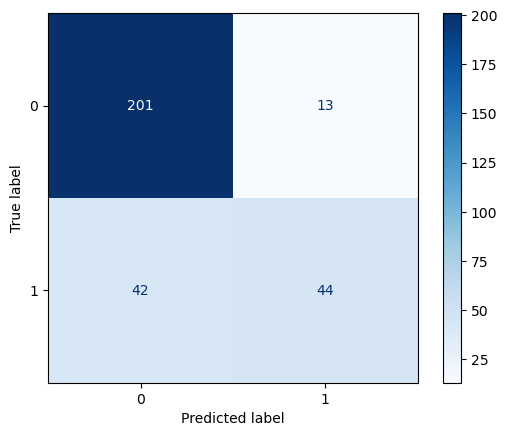

In [288]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Criando a matriz de confusão e exibindo-a
matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, teste_x, teste_y, cmap='Blues', values_format='.3g')

# Exibindo a matriz de confusão
plt.show()


Como puderam perceber, a matriz de confusão é uma matriz 2x2 e em cada quadrante dela existe uma métrica estatística que nos diz algo sobre o modelo. Então vamos começar entendendo aqui o que são esses quadrantes e o que eles implicam nos modelos. O primeiro valor que vamos conversar aqui são os verdadeiros positivos.

**Verdadeiros Positivos**

O quadrante superior esquerdo me traz os verdadeiros positivos. O que significa isso no nosso modelo? Para simplificar, para ficar um pouco mais fácil de entendermos, vamos pensar que o nosso classificador não é mais o classificador de concessão de crédito do ByteBank, vamos pensar em um classificador de gatos, ou seja, o meu modelo quer decidir se um animal é gato ou não.
Pensando nesse classificador mais simplificado, vamos entender o que significam os verdadeiros positivos. Eu tenho aqui a imagem de um animal, claramente conseguimos perceber que é um gato. Nós vamos passar essa imagem no nosso classificador e ele realmente classifica como um gato, ele acertou a predição.
 Então os verdadeiros positivos são aqueles valores que o nosso modelo diz que é um gato e realmente é. Ou então, pensando no ByteBank, o modelo me diz que é um bom pagador e realmente é um bom pagador. O próximo quadrante que vamos entender será o quadrante superior direito. Nele nós temos os valores dos falsos positivos.

 **Falsos Positivos**
 
 Vamos voltar para o nosso classificador de cachorros. Aqui nós temos a imagem de um cão, ou seja, de um animal que não é um gato. Nós passamos essa imagem no nosso classificador, damos como entrada, como base de dados, e ele classifica como gato, ou seja, está errado.
 Pensando no ByteBank, quer dizer que o meu modelo classificou como um bom pagador alguém que na verdade é um mau pagador. A próxima métrica que vamos entender, da matriz de confusão, será a do quadrante inferior esquerdo.

 **Falsos Negativos**
 
  Eu tenho a imagem de um gato, eu dou como entrada para o meu classificador e ele classifica como não gato, como um cão. Ou seja, ele não acertou a predição.
  Pensando no ByteBank, significa que eu tenho um bom pagador, mas, na verdade, o meu modelo classificou ele como um mau pagador, e eu posso até deixar de emprestar dinheiro para essa pessoa, por exemplo.

  **Verdadeiros Negativos**
  
  O último quadrante, e realmente não é o menos importante, vamos estudar o quadrante inferior direito. Nele, nós temos os verdadeiros negativos. Significa que eu tenho a imagem de um não gato, ou seja, aqui de um cão, eu dou como entrada para o meu classificador e ele classifica como não gato. Ou seja, ele acertou a predição.
  Pensando no nosso modelo de concessão de crédito, significa que o meu modelo classificou como um mau pagador alguém que realmente era um mau pagador.

  **Resumindo**

  Nós temos duas possibilidades: ou o meu modelo de fato acerta a minha predição ou então ele erra.
   O meu modelo vai acertar quando ele predizer os verdadeiros positivos e os verdadeiros negativos. Ou seja, eu vou classificar uma pessoa que é boa pagadora em boa pagadora ou eu vou classificar uma pessoa que é uma má pagadora em realmente uma má pagadora.
   Temos a segunda opção também, que é o nosso modelo errar as predições. Nós temos dois outros quadrantes dedicados a isso, os falsos positivos e os falsos negativos. Ou seja, eu classifico como um bom pagador alguém que não é ou eu classificado como um mau pagador alguém que não é.
   Agora vamos voltar para a nossa matriz de confusão real e entender o que nós temos.
   Nós temos 201 ocorrências no quadrante de verdadeiros positivos, nós temos 13 ocorrências no quadrante de falsos positivos, nós temos 42 ocorrências no quadrante de falsos negativos e temos 44 ocorrências no quadrante de verdadeiros negativos. Isso significa que o nosso modelo teve 201 mais 44 predições corretas, ou seja, 245 predições corretas versus 55 predições erradas, ou seja, 42 mais 13.
   

#### Metricas derivadas da Matriz de Confusão

In [289]:
from sklearn.metrics import classification_report

print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       214
           1       0.77      0.51      0.62        86

    accuracy                           0.82       300
   macro avg       0.80      0.73      0.75       300
weighted avg       0.81      0.82      0.80       300



**Precisão (precision):** 
A proporção de exemplos corretamente classificados como positivos entre os exemplos que foram previstos como positivos.

**Revocação (recall):**
A proporção de exemplos verdadeiramente positivos que foram corretamente identificados pelo modelo.

**F1-Score:**
A média harmônica entre precisão e revocação, que equilibra as duas métricas.

**Suporte (support):**
O número de ocorrências reais de cada classe no conjunto de teste.

### **Curva ROC**

Além da precisão, do recall e do F1-score , que são métricas derivadas da matriz de confusão, nós podemos também gerar um gráfico que provém da mesma matriz e é também muito relevante na hora de decidir o melhor modelo, que será usado como motor da concessão de crédito pelo ByteBank.
 Esse gráfico é o gráfico da curva ROC. Ele é muito importante porque ele traz uma nova perspectiva e novos argumentos sobre a calibragem da nossa regressão logística, do nosso modelo de classificação. Para poder plotar esse gráfico, vamos usar duas funções do Scikit-learn: a roc_curve e a roc auc score .

roc_auc 0.8173766572484243


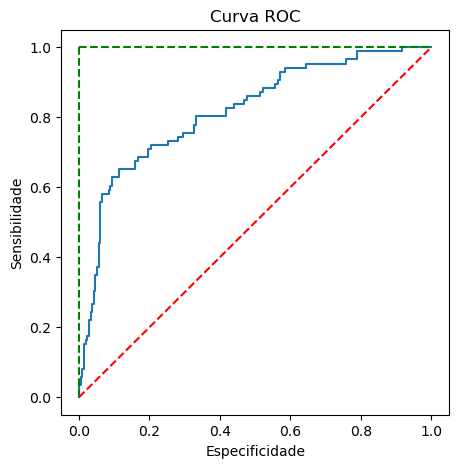

In [290]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa falsos positivos
#tvp = taxa verdadeiros positivos
tfp,tvp, limite = roc_curve(teste_y, prob_previsao)   # desenhar a curva
print('roc_auc', roc_auc_score(teste_y, prob_previsao)) # calcular a área sobre a curva roc

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde


plt.show()

### Explicação sobre Curva ROC e AUC

Agora vamos entender melhor o que são TFP, TVP e o significado dessas taxas, que também são chamadas de **sensibilidade** e **especificidade**. Vamos nos aprofundar na **Curva ROC**, que avalia o desempenho de um modelo ao comparar a taxa de verdadeiros positivos com a taxa de falsos positivos, em diferentes limiares. No nosso código, por exemplo, tivemos que definir esses valores: TFP, TVP e o limite.
##
### Sensibilidade e Especificidade

- **Verdadeiros Positivos (Sensibilidade)**: Também chamada de _recall_, indica a taxa de acertos para a categoria alvo, ou seja, a classe "1".
- **Falsos Positivos (Especificidade)**: Mede a taxa de erros ao classificar a categoria "0" como "1".

As fórmulas para calcular essas métricas são:

- **Especificidade** = Verdadeiros Negativos / (Verdadeiros Negativos + Falsos Positivos)
- **Sensibilidade** = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Neg##ativos)

### Curva ROC

A **Curva ROC** representa a relação entre a sensibilidade e a especificidade. No gráfico da curva ROC:

- A **linha vermelha** representa um modelo **aleatório**, em que as previsões são feitas sem seguir nenhuma tendência.
- A **linha verde** representa um modelo **perfeito**, onde todas as previsões estão corretas.

Sabemos que tanto um modelo perfeito quanto um totalmente aleatório são improváveis. Assim, a **Curva ROC real** estará sempre entre es##sas duas linhas.

### Objetivo da Curva ROC

Nosso objetivo é que a curva ROC esteja o mais próxima possível da linha verde, especificamente no **canto superior esquerdo** do gráfico. Isso **maximiza a taxa de verdadeiros positivos** e **minimiza a de falsos positivos**, o qu##e é o cenário ideal.

### AUC (Área sob a Curva)

Para quantificar a curva ROC, utilizamos a **Área Sob a Curva** (AUC), que nos dá uma medida da performance do modelo. Existem algumas convenções estatísticas para interpretar a AUC:

| AUC Range          | Interpretação           |
|--------------------|-------------------------|
| Área < 0.7         | Discriminação baixa      |
| 0.7 ≤ Área < 0.8   | Discriminação aceitável  |
| 0.8 ≤ Área < 0.9   | Discriminação excelente  |
| Área ≥ 0.9         | Discriminação excepcional|

No nosso gráfico, a AUC é **0.81**, o que indica uma **discriminação excelent##e** de acordo com essa convenção.

### Conclusão

Agora que entendemos a **matriz de confusão**, as métricas que dela derivam e a **Curva ROC**, que é essencial para avaliar um modelo, estamos prontos para escolher o melhor modelo para o motor de concessão de crédito do ByteBank.


## **Comparação e escolha do modelo**

### **Separação de variáveis**

A base de dados que estamos trabalhando até agora é inspirada em um **conjunto de dados alemão**, e, como podemos perceber, temos uma única variável que reúne informações de **sexo** e **estado civil**.

No entanto, os modelos de crédito são **fiscalizados** e **regulamentados** por autoridades locais, e existem diversas regras que precisam ser seguidas. Entre essas regras, há informações que **não podem ser associadas** ao modelo.

---

### **Informações Sensíveis**

As autoridades reguladoras locais consideram as seguintes informações como **sensíveis**:

- **Origem social e étnica**
- **Condições de saúde**
- **Informação genética**
- **Orientação sexual**
- **Convicções políticas, religiosas e filosóficas**

---

Portanto, enquanto o **sexo** é considerado uma **informação sensível**, o **estado civil** não é. Não é permitido fazer a diferenciação de concessão de crédito com base no sexo. Cada instituição pode definir suas próprias **políticas de crédito**, mas o **modelo de concessão** não pode utilizar o sexo como critério.

> *Dica*: Lembre-se de sempre revisar as **regras locais** para garantir a conformidade do modelo de crédito!
rio.


In [291]:
#categorias da variavel 'sexo_est_civil'

#male : divorced/separated = 1
#female : divorced/separated/married = 2
#male : single = 3
#male : married/widowed = 4
#female : single = 5

#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteira
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

df['sexo'] = df['sexo_est_civil'].map(dic_sexo)
df['estado_civil'] = df['sexo_est_civil'].map(dic_est_civil)

df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,5,5,1169,1,1,4,3,...,67,3,2,2,3,1,1,1,0,1
1,1,2,48,3,5,5951,5,3,2,2,...,22,3,2,1,3,1,0,1,1,0
2,0,4,12,5,8,2096,5,2,2,3,...,49,3,2,1,2,2,0,1,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,45,3,3,1,3,2,0,1,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,53,3,3,2,3,2,0,1,0,1


In [292]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = df.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil
0,0,1,6,5,5,1169,1,1,4,1,...,1,67,3,2,2,3,1,1,1,1
1,1,2,48,3,5,5951,5,3,2,1,...,1,22,3,2,1,3,1,0,1,0
2,0,4,12,5,8,2096,5,2,2,1,...,1,49,3,2,1,2,2,0,1,1
3,0,1,42,3,4,7882,5,2,2,3,...,2,45,3,3,1,3,2,0,1,1
4,1,1,24,4,1,4870,5,3,3,1,...,4,53,3,3,2,3,2,0,1,1


### **Ajuste do modelo**

Agora que já fizemos nossa regressão inicial, uma regressão de teste, e exploramos as **métricas estatísticas** que serão usadas para avaliar os modelos, o próximo passo é **variar a base de dados**. Isso permitirá criar novas regressões e compará-las, ajudando a entender qual modelo será escolhido para a **concessão de crédito do ByteBank**.

Na primeira regressão, fomos passo a passo, entendendo o que cada etapa significa, separando e realizando com bastante calma. Porém, agora precisaremos fazer mais de uma regressão, então será muito importante **otimizar o nosso tempo**.


Vamos entender quais foram as grandes **etapas lógicas** seguidas, tanto no ajuste do modelo quanto na validação. 

Para **modelar**, seguimos os seguintes passos:
1. Separação da **base de modelagem** e da **variável resposta**.
2. Divisão das bases em **treino** e **teste**.
3. Ajuste do modelo utilizando a **regressão logística** através do **Scikit-learn**.

Para **validar** o modelo, realizamos:
1. A **matriz de confusão**.
2. O **classification report**, que é derivado da matriz de confusão.
3. A **curva ROC**.

Agora, o nosso desafio é **transformar essas etapas lógicas em uma função**.


In [293]:
#funcao 'roda_modelo': ajuste a validacao

def executar_modelo(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = base_dados['default']
    x = base_dados.drop(columns='default')

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))
    print(100*'-')

#ajustamdo modelo com base de teste
    
    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

# Como vimos na primeira parte do código, inicialmente verificámos a acurácia.
# No entanto, não iremos incluir a acurácia nesta segunda parte da função de validação
# porque estamos a lidar com uma base de dados desbalanceada, onde a acurácia não é 
# uma métrica adequada para avaliação.

# Assim, removemos a etapa da acurácia na validação do modelo. 
# Agora, iremos continuar com o próximo passo: a matriz de confusão, 
# que é um excelente parâmetro estatístico para avaliar classificadores.
# Vamos definir novamente a nossa matriz de confusão a partir daqui.

    
#matriz de confusao

    matriz_confusao =ConfusionMatrixDisplay.from_estimator(modelo, teste_x, teste_y, values_format = '.3g', cmap = 'Blues')
    plt.title('Matriz de Confusao')
    plt.show

#classification report

    previsoes = modelo.predict(teste_x)

    print('\nClassification Report:')
    print(classification_report(teste_y, previsoes))

#curva ROC  e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
   
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
    plt.ylabel('Sensibilidade')
    plt.xlabel('Especificidade')
    plt.show() 

    return modelo, matriz_confusao

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       214
           1       0.75      0.51      0.61        86

    accuracy                           0.81       300
   macro avg       0.79      0.72      0.74       300
weighted avg       0.80      0.81      0.80       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.8107476635514018


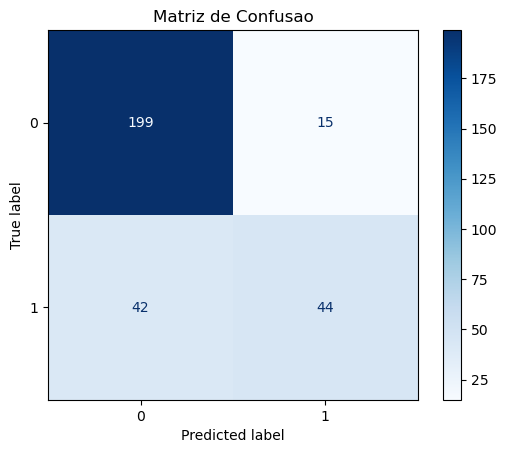

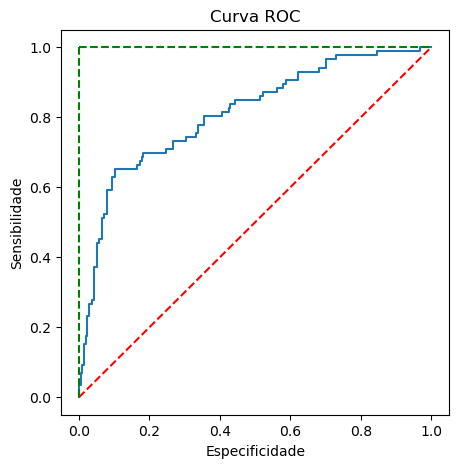

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x182f9fb8680>)

In [294]:
# Visualizando os dados do modelo
executar_modelo(base_dados, LogisticRegression(max_iter=1000))

### **Faixa de Classificação**

Até aqui já entendemos como se ajusta um **modelo de regressão logística** e quais são os **parâmetros estatísticos** que podemos usar para validar esse modelo. Além disso, já criámos uma função que automatiza tanto o ajuste como a validação dos modelos.

No entanto, um aspecto ainda não mencionado, mas extremamente importante e relevante no **sistema financeiro**, é que neste sistema **não analisamos o indivíduo isoladamente**. Em vez disso, analisamos o **comportamento de um grupo** e ajustamos o indivíduo dentro desse grupo.


In [295]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

df['faixa_idade'] = pd.cut(x = df['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])

In [296]:
#criando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

## 01 - 12 = 1
## 13 - 24 = 2
## 25 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6


df['faixa_prazo_emprestimo'] = pd.cut(x = df['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])

In [297]:
#criando 'faixa_valor_emprestimo' para variavel 'valor_emprestimo'

## 1 - 1000 = 1
## 1001 - 2000 = 2
## 2001 - 3000 = 3
## 3001 - 4000 = 4
## 4001 - 5000 = 5
## 5001 - 6000 = 6
## 6001 - 7000 = 7
## 7001 - 8000 = 8
## 8001 - 9000 = 9
## 9001 - 10000 = 10
## 10001 - 11000 = 11
## 11001 - 12000 = 12
## 12001 - 13000 = 13
## 13001 - 14000 = 14
## 14001 - 15000 = 15
## 15001 - 16000 = 16
## 16001 - 17000 = 17
## 17001 - 18000 = 18
## 18001 - 19000 = 19
## 19001 - 20000 = 20

df['faixa_valor_emprestimo'] = pd.cut(x = df['valor_emprestimo'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], 
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [298]:
#funcao para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = df.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,5,5,1,1,4,1,4,1,...,2,2,3,1,1,1,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,...,2,1,3,1,0,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,...,2,1,2,2,0,1,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,...,3,1,3,2,0,1,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,...,3,2,3,2,0,1,1,4,2,5


A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       214
           1       0.68      0.45      0.55        86

    accuracy                           0.78       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.77      0.78      0.77       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7990654205607477


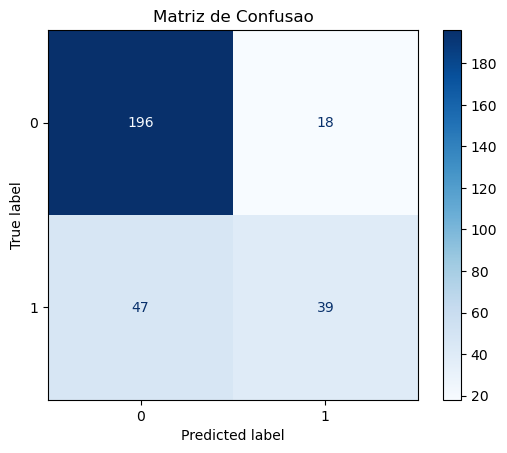

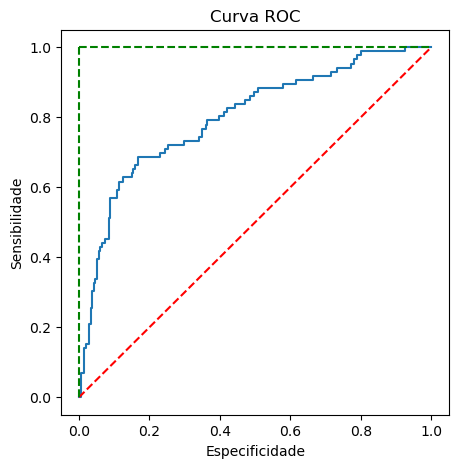

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x182f8e89fd0>)

In [299]:
#executar novamente o modelo
executar_modelo(base_dados, LogisticRegression(max_iter=1000))

Agora que produzimos nossos primeiros modelos e conhecemos as métricas estatísticas resultantes, é crucial determinar qual modelo melhor atende às necessidades do ByteBank. A seguir, analisaremos os resultados de cada um dos modelos desenvolvidos.

1. **Teste de Regressão - Categoria 1:**

   - Precisão: 76%
   - Recall: 48%
   - F1-score: 59%
   - Eventos: 86
   - Área sob a curva ROC: 0.8194 (aproximadamente 0.82)

   **Resumo das métricas:**

   | Métrica   | 0    | 1    | Acurácia | Média Macro | Média Ponderada |
   |-----------|------|------|----------|-------------|-----------------|
   | Precisão  | 0.82 | 0.76 | 0.81     | 0.79        | 0.80            |
   | Recall    | 0.94 | 0.48 |          | 0.71        | 0.81            |
   | F1-score  | 0.87 | 0.59 |          | 0.73        | 0.79            |
   | Suporte   | 214  | 86   | 300      | 300         | 300             |
   | ROC AUC   | 0.8194 (aproximado)    |

2. **Regressão sem as variáveis "Sexo" e "Sexo_Estado_Civil" - Categoria 1:**

   - Precisão: 77%
   - Recall: 48%
   - F1-score: 59%
   - Eventos: 86
   - Área sob a curva ROC: 0.810 (um pouco mais baixa que a anterior)

   **Resumo das métricas:**

   | Métrica   | 0    | 1    | Acurácia | Média Macro | Média Ponderada |
   |-----------|------|------|----------|-------------|-----------------|
   | Precisão  | 0.82 | 0.77 | 0.81     | 0.80        | 0.81            |
   | Recall    | 0.94 | 0.48 |          | 0.71        | 0.81            |
   | F1-score  | 0.88 | 0.59 |          | 0.73        | 0.79            |
   | Suporte   | 214  | 86   | 300      | 300         | 300             |
   | ROC AUC   | 0.8103 |

3. **Regressão sem as variáveis "Sexo", "Estado_Civil_Sexo" e variáveis absolutas - Categoria 1:**

   - Precisão: 68%
   - Recall: 45%
   - F1-score: 55%
   - Eventos: 86
   - Área sob a curva ROC: 0.799

   **Resumo das métricas:**

   | Métrica   | 0    | 1    | Acurácia | Média Macro | Média Ponderada |
   |-----------|------|------|----------|-------------|-----------------|
   | Precisão  | 0.81 | 0.68 | 0.78     | 0.75        | 0.77            |
   | Recall    | 0.92 | 0.45 |          | 0.68        | 0.78            |
   | F1-score  | 0.86 | 0.55 |          | 0.70        | 0.77            |
   | Suporte   | 214  | 86   | 300      | 300         | 300             |
   | ROC AUC   | 0.7991 |

**Conclusão**

Em termos de precisão e recall, o segundo modelo parece ser o mais equilibrado. Ele mantém o recall e o f1-score enquanto melhora ligeiramente a precisão, embora a área sob a curva ROC tenha sofrido uma pequena queda.

A escolha final do modelo depende do apetite de risco do ByteBank. Como uma instituição conservadora, pode ser apropriado optar pelo último modelo, que oferece um bom equilíbrio entre precisão e recall. Embora tenha perdido alguma precisão, compensa com um ganho em recall, o que pode ser desejável em um cenário de menor risco.

Finalmente, vale ressaltar que mais testes e ajustes, como a inclusão ou remoção de variáveis, podem ser realizados para melhorar ainda mais o modelo. A seleção do modelo é um processo que envolve trade-offs, e não há uma única resposta, mas o modelo escolhido até agora é este.

ão há uma resposta única, mas o modelo escolhido até agora é este.


### **Melhor Modelo**

Agora que compreendemos os principais aspectos a considerar ao escolher um modelo, é importante reconhecer que essa decisão envolve trade-offs sensíveis. Qualquer variável que seja adicionada ou removida pode impactar significativamente o resultado final do modelo.

**Escolha do Modelo**

Com base na análise anterior, decidimos que o modelo mais adequado até agora é aquele que **não utiliza as variáveis de "sexo"** e **variáveis absolutas**. Este modelo oferece um equilíbrio aceitável entre precisão e recall, considerando o apetite de risco do ByteBank.

**Próximo Passo: Treinamento do Modelo**

Com a escolha do modelo definida, o próximo passo é **treinar o modelo final** utilizando toda a base de dados disponível. Isso garantirá que o modelo seja ajustado de forma otimizada para todos os dados que temos, proporcionando uma previsão mais robusta e confiável.

Vamos prosseguir com o treinamento do modelo na base completa.


In [300]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = df.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,5,5,1,1,4,1,4,1,...,2,2,3,1,1,1,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,...,2,1,3,1,0,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,...,2,1,2,2,0,1,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,...,3,1,3,2,0,1,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,...,3,2,3,2,0,1,1,4,2,5


In [301]:
#treinar modelo com a base inteira

modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x= base_dados.drop(columns = 'default')
modelo.fit(x,y)

LogisticRegression(max_iter=1000)

In [302]:
modelo.predict(x)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,